Convert the WOD files (ODV spreadsheet) into netCDF storing the observations as vectors (no profiles or stations.)       
Note that EDMO_codes and LOCAL_CDI_ID metadata have to be added to the files prior to their reading.

In [1]:
using NCDatasets
using PhysOcean
using DIVAnd
using PyPlot
using Dates

In [2]:
woddatadir = "/data/SeaDataCloud/NorthSea/WOD/NativeLevels/"
outputdir = "/data/SeaDataCloud/NorthSea/"

woddatafile = joinpath(woddatadir, "data_from_data_from_WOD-PFL-OSD-QCed_EDMO.txt")
isfile(woddatafile)

true

## Read data
### Temperature

In [3]:
@time obsval,obslon,obslat,obsdepth,obstime,obsid = ODVspreadsheet.load(Float64,[woddatafile],
                           ["Temperature"]; qv_flags=["0"], nametype = :localname, qvlocalname = "QV:WOD");

┌ Info: Reading data from file /data/SeaDataCloud/NorthSea/WOD/NativeLevels/data_from_data_from_WOD-PFL-OSD-QCed_EDMO.txt
└ @ DIVAnd.ODVspreadsheet /home/ctroupin/.julia/packages/DIVAnd/dM13X/src/ODVspreadsheet.jl:81
┌ Info: No. of profiles in the file: 173566
└ @ DIVAnd.ODVspreadsheet /home/ctroupin/.julia/packages/DIVAnd/dM13X/src/ODVspreadsheet.jl:250


 73.531910 seconds (634.06 M allocations: 36.647 GiB, 34.84% gc time)


In [4]:
obsid

1119529-element Array{String,1}:
 "-"
 "-"
 "-"
 "-"
 "-"
 "-"
 "-"
 "-"
 "-"
 "-"
 "-"
 "-"
 "-"
 ⋮  
 "-"
 "-"
 "-"
 "-"
 "-"
 "-"
 "-"
 "-"
 "-"
 "-"
 "-"
 "-"

Keep only temperature between 0 and 40°C.

In [4]:
goodval = findall((obsval .>= 0) .& (obsval .< 40.));

In [5]:
obsval,obslon,obslat,obsdepth,obstime,obsid = 
obsval[goodval],obslon[goodval],obslat[goodval],obsdepth[goodval],obstime[goodval],obsid[goodval];

### Remove bad profiles
(uncomplete date leading to Datetime with year = -4713)

In [6]:
years00 = Dates.year.(obstime);
goodyears = findall(years00 .> 0.);
obsval,obslon,obslat,obsdepth,obstime,obsid = 
obsval[goodyears],obslon[goodyears],obslat[goodyears],obsdepth[goodyears],obstime[goodyears],obsid[goodyears];

### Salinity

In [7]:
@time obsval2,obslon2,obslat2,obsdepth2,obstime2,obsid2 = ODVspreadsheet.load(Float64,[woddatafile],
                           ["Salinity"]; qv_flags=["0"], nametype = :localname, qvlocalname = "QV:WOD");

┌ Info: Reading data from file /data/SeaDataCloud/NorthSea/WOD/NativeLevels/data_from_data_from_WOD-PFL-OSD-QCed_EDMO.txt
└ @ DIVAnd.ODVspreadsheet /home/ctroupin/.julia/packages/DIVAnd/dM13X/src/ODVspreadsheet.jl:81
┌ Info: No. of profiles in the file: 173566
└ @ DIVAnd.ODVspreadsheet /home/ctroupin/.julia/packages/DIVAnd/dM13X/src/ODVspreadsheet.jl:250


 65.951176 seconds (625.06 M allocations: 36.227 GiB, 38.81% gc time)


In [8]:
years00 = Dates.year.(obstime2);
goodyears2 = findall(years00 .> 0.);

In [9]:
obsval2,obslon2,obslat2,obsdepth2,obstime2,obsid2 = 
obsval2[goodyears2],obslon2[goodyears2],obslat2[goodyears2],obsdepth2[goodyears2],obstime2[goodyears2],obsid2[goodyears2];

In [10]:
goodval = findall((obsval2 .>= 0) .& (obsval2 .< 40.));
obsval2,obslon2,obslat2,obsdepth2,obstime2,obsid2 = 
obsval2[goodval],obslon2[goodval],obslat2[goodval],obsdepth2[goodval],obstime2[goodval],obsid2[goodval];

In [21]:
@info("Number of temperature data: $(length(obsval))")
@info("Number of temperature data: $(length(obsval2))")

┌ Info: Number of temperature data: 1091223
└ @ Main In[21]:1
┌ Info: Number of temperature data: 1085790
└ @ Main In[21]:2


### Extra check salinity

In [11]:
shallowdepth = findall(obsdepth2 .< 5.);
@show length(shallowdepth)

length(shallowdepth) = 165384


165384

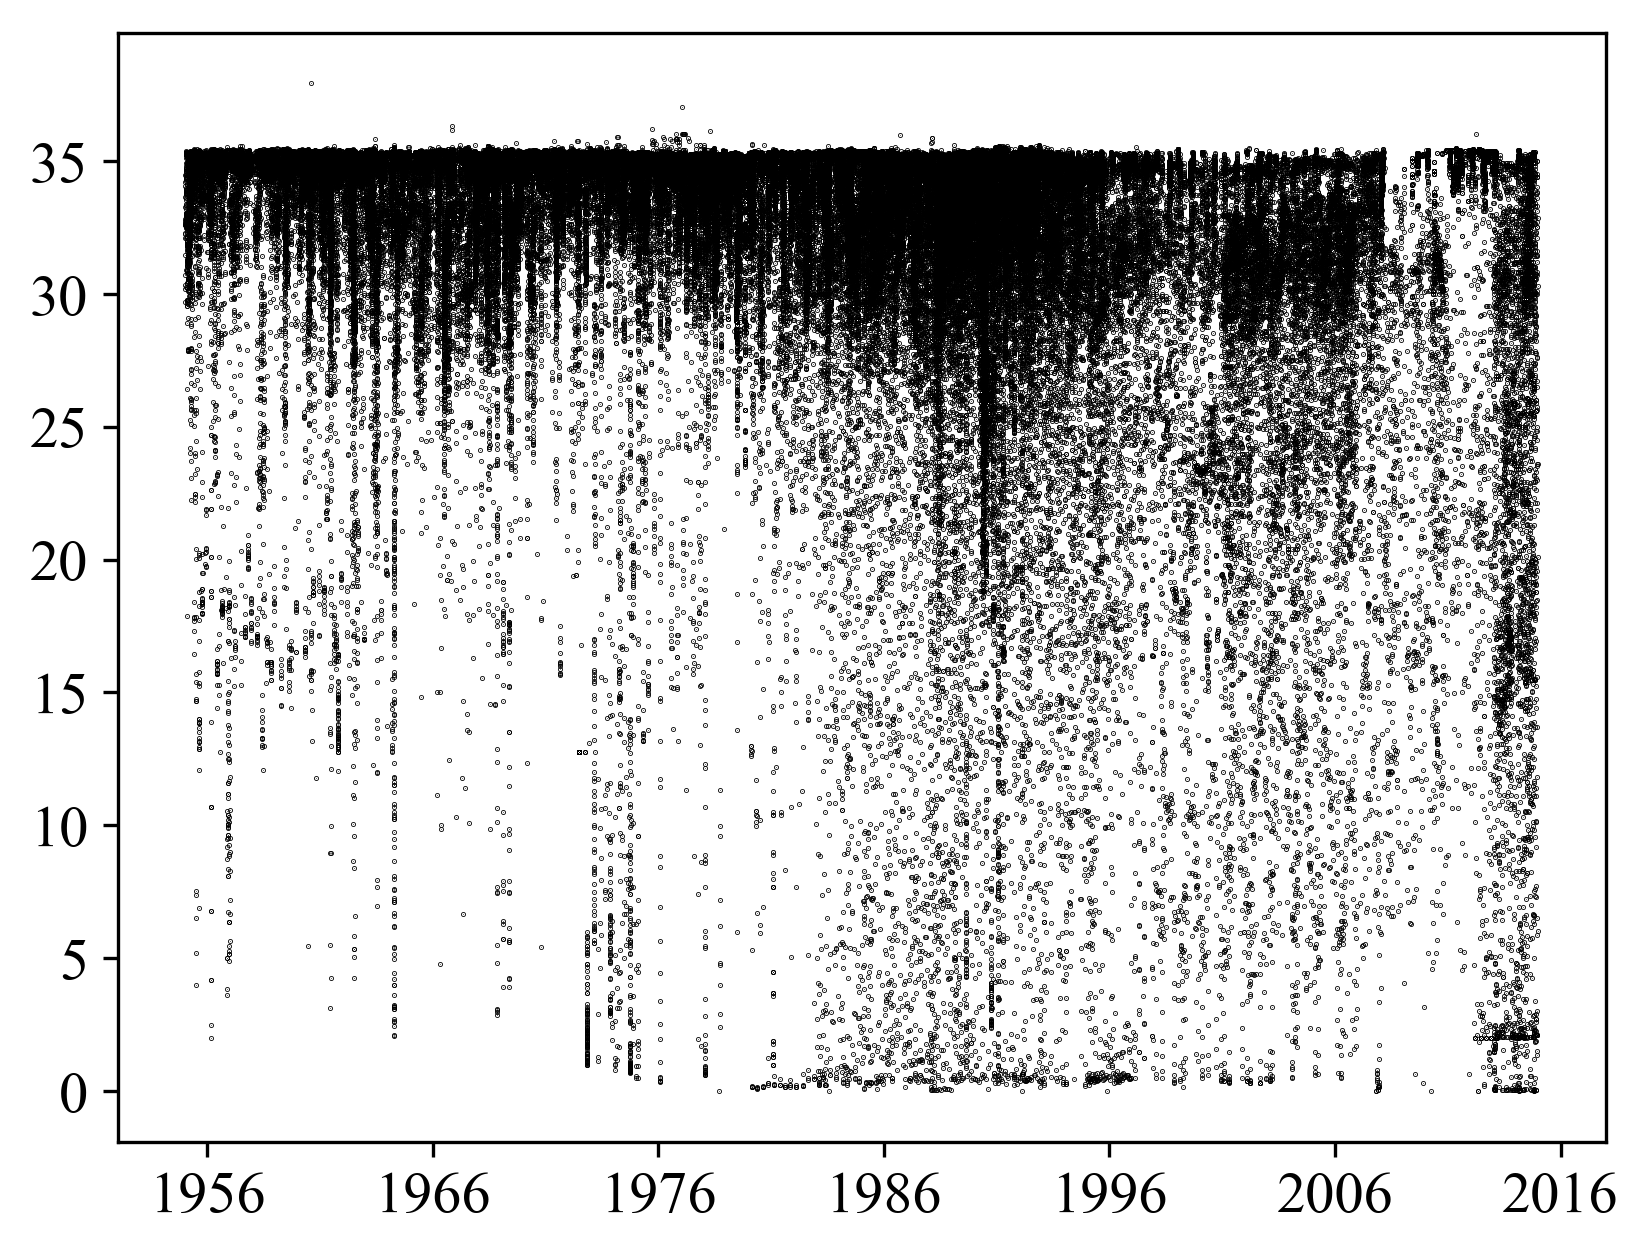

In [14]:
obsval3 = obsval2[shallowdepth];
obstime3 = obstime2[shallowdepth];
PyPlot.plot(obstime3, obsval3, "ko", markersize=0.2)
PyPlot.show()

## Export to observation file

In [22]:
@info("Writing the data and coordinates into an observation file")
DIVAnd.saveobs(joinpath(outputdir, "NorthSea_obs_Temperature_wod.nc"), "Temperature", obsval,
              (obslon, obslat, obsdepth, obstime),obsid)

┌ Info: Writing the data and coordinates into an observation file
└ @ Main In[22]:1


In [23]:
DIVAnd.saveobs(joinpath(outputdir, "NorthSea_obs_Salinity_wod.nc"), "Salinity", obsval2,
              (obslon2, obslat2, obsdepth2, obstime2),obsid2)